In [1]:
import pandas  as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("/content/sample_data/scoutium_attributes.csv",sep=";")
df=pd.read_csv("/content/sample_data/scoutium_potential_labels.csv",sep=";")

In [3]:
df = pd.merge(df1, df, on=['task_response_id', 'match_id', 'evaluator_id', 'player_id'])

In [4]:
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


In [5]:
import numpy as np
df["position_id"]=df["position_id"].replace({1:np.nan})
df["potential_label"]=df["potential_label"].replace({"below_average":np.nan})
df.dropna(inplace=True)

In [6]:
df= df.pivot_table(index=["player_id", "position_id", "potential_label"], columns="attribute_id", values="attribute_value")
df

attribute_id                           4322  4323  4324  4325  4326  4327  \
player_id position_id potential_label                                       
1355710   7.0         average          50.5  50.5  34.0  50.5  45.0  45.0   
1356362   9.0         average          67.0  67.0  67.0  67.0  67.0  67.0   
1356375   3.0         average          67.0  67.0  67.0  67.0  67.0  67.0   
          4.0         average          67.0  78.0  67.0  67.0  67.0  78.0   
1356411   9.0         average          67.0  67.0  78.0  78.0  67.0  67.0   
...                                     ...   ...   ...   ...   ...   ...   
1907347   5.0         average          67.0  78.0  78.0  56.0  78.0  67.0   
          6.0         average          67.0  67.0  67.0  67.0  67.0  67.0   
1909532   10.0        average          56.0  45.0  45.0  45.0  56.0  56.0   
1909724   2.0         highlighted      78.0  78.0  78.0  78.0  78.0  78.0   
1909728   7.0         highlighted      78.0  67.0  67.0  78.0  67.0  67.0   

attribute_id                           4328  4329  4330  4332  ...  4352  \
player_id position_id potential_label                          ...         
1355710   7.0         average          45.0  45.0  50.5  56.0  ...  56.0   
1356362   9.0         average          67.0  67.0  67.0  67.0  ...  67.0   
1356375   3.0         average          67.0  78.0  67.0  67.0  ...  67.0   
          4.0         average          78.0  78.0  56.0  67.0  ...  78.0   
1356411   9.0         average          67.0  67.0  89.0  78.0  ...  67.0   
...                                     ...   ...   ...   ...  ...   ...   
1907347   5.0         average          78.0  67.0  56.0  78.0  ...  67.0   
          6.0         average          67.0  78.0  67.0  67.0  ...  67.0   
1909532   10.0        average          56.0  56.0  23.0  23.0  ...  45.0   
1909724   2.0         highlighted      78.0  78.0  67.0  67.0  ...  78.0   
1909728   7.0         highlighted      67.0  78.0  67.0  67.0  ...  67.0   

attribute_id                           4353  4354  4355  4356  4357  4407  \
player_id position_id potential_label                                       
1355710   7.0         average          34.0  39.5  50.5  34.0  34.0  56.0   
1356362   9.0         average          67.0  78.0  67.0  67.0  67.0  67.0   
1356375   3.0         average          67.0  78.0  67.0  67.0  67.0  67.0   
          4.0         average          67.0  67.0  67.0  56.0  67.0  56.0   
1356411   9.0         average          56.0  67.0  67.0  56.0  67.0  89.0   
...                                     ...   ...   ...   ...   ...   ...   
1907347   5.0         average          67.0  67.0  67.0  56.0  67.0  78.0   
          6.0         average          67.0  78.0  67.0  67.0  67.0  67.0   
1909532   10.0        average          45.0  56.0  34.0  34.0  56.0  34.0   
1909724   2.0         highlighted      78.0  78.0  67.0  67.0  67.0  78.0   
1909728   7.0         highlighted      67.0  78.0  67.0  67.0  67.0  78.0   

attribute_id                           4408  4423  4426  
player_id position_id potential_label                    
1355710   7.0         average          34.0  34.0  56.0  
1356362   9.0         average          67.0  56.0  78.0  
1356375   3.0         average          67.0  56.0  78.0  
          4.0         average          67.0  45.0  56.0  
1356411   9.0         average          56.0  67.0  78.0  
...                                     ...   ...   ...  
1907347   5.0         average          78.0  78.0  56.0  
          6.0         average          67.0  67.0  78.0  
1909532   10.0        average          34.0  34.0  23.0  
1909724   2.0         highlighted      78.0  67.0  78.0  
1909728   7.0         highlighted      67.0  67.0  78.0  

[271 rows x 34 columns]

In [7]:
df = df.reset_index()

In [8]:
df.columns = df.columns.map(str)

In [9]:
df.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7.0,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9.0,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3.0,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4.0,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9.0,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "player_id"]

Observations: 271
Variables: 37
cat_cols: 7
num_cols: 30
cat_but_car: 0
num_but_cat: 6


In [11]:
from sklearn.preprocessing import  LabelEncoder, StandardScaler
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if col in "potential_label"]

for col in binary_cols:
    label_encoder(df, col)


In [12]:
df.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7.0,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9.0,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3.0,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4.0,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9.0,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [13]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

df.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7.0,0,-0.542606,-0.559398,34.0,-0.437916,-0.766602,-0.794802,45.0,...,56.0,-1.281899,-1.132245,-0.494569,-1.234869,34.0,-0.142650,-1.487256,34.0,-0.252741
1,1356362,9.0,0,0.595327,0.560776,67.0,0.682837,0.722639,0.722929,67.0,...,67.0,0.813645,1.052769,0.631718,0.914913,67.0,0.529664,0.668713,56.0,1.041611
2,1356375,3.0,0,0.595327,0.560776,67.0,0.682837,0.722639,0.722929,67.0,...,67.0,0.813645,1.052769,0.631718,0.914913,67.0,0.529664,0.668713,56.0,1.041611
3,1356375,4.0,0,0.595327,1.307560,67.0,0.682837,0.722639,1.481795,78.0,...,78.0,0.813645,0.428479,0.631718,0.198319,67.0,-0.142650,0.668713,45.0,-0.252741
4,1356411,9.0,0,0.595327,0.560776,78.0,1.430006,0.722639,0.722929,67.0,...,67.0,0.115130,0.428479,0.631718,0.198319,67.0,1.874292,-0.049944,67.0,1.041611


In [ ]:
X=df.drop("potential_label",axis=1)
y=df["potential_label"]
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   # ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X, y, scoring="accuracy")

In [ ]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}


classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]



def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

best_models = hyperparameter_optimization(X, y)

In [16]:
search_model = RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=15, n_estimators=300)

In [17]:
cv_results = cross_validate(search_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean(),cv_results['test_f1'].mean(),cv_results['test_roc_auc'].mean()

(0.8707671957671957, 0.561923076923077, 0.9004545454545456)

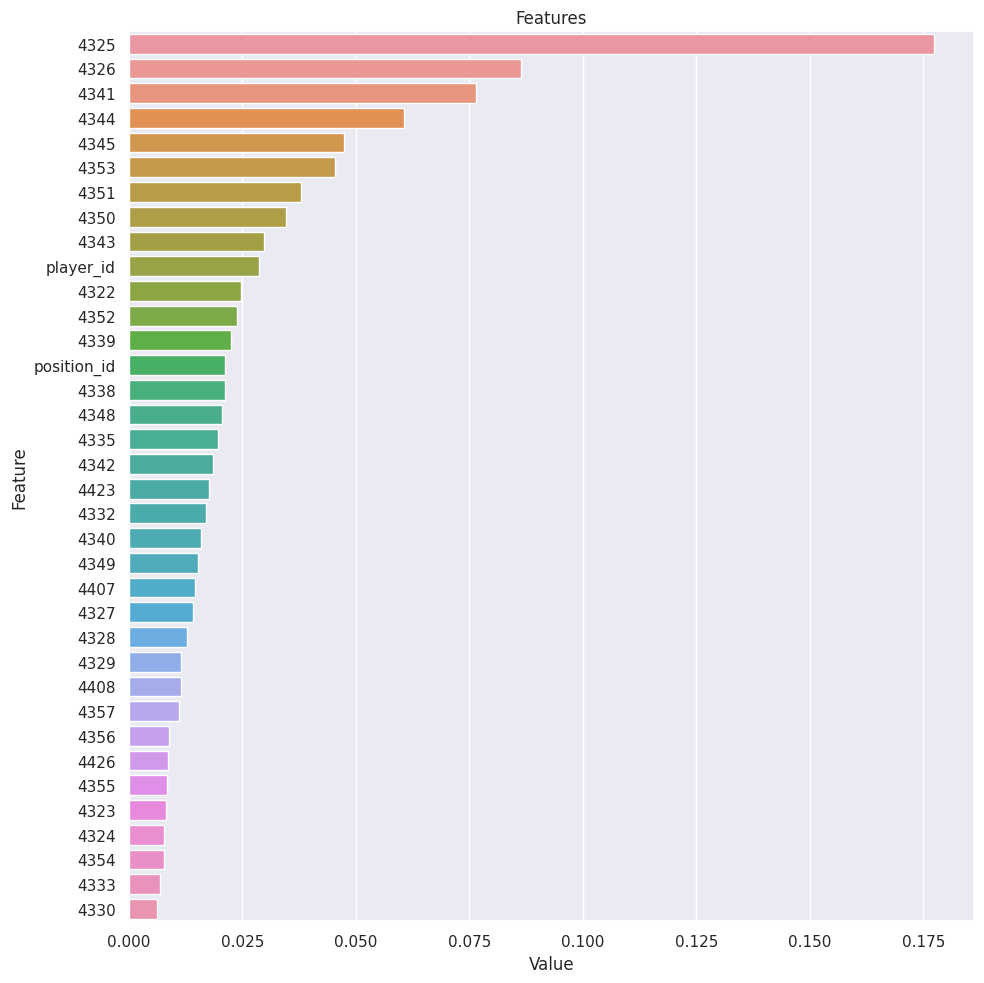

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)